<h1 align='center'><strong>GRAPE LEAF QUALITY CLASSIFICATION</dtrong></h1>

<p>Farid Rahimli</p>
<p>GH1029730</p>
<p>M507B Method of Prediction</p>

***

### https://www.kaggle.com/datasets/rm1000/grape-disease-dataset-original

***

<h2 align='center'><strong>PROBLEM STATEMENT</strong></h2>

***

***

<h3 align='center'><strong>PROBLEM</strong></h3>
<h4>Wine business is a very widespread area of trade worldwide that accumulates large amounts resources. Due to the main raw material in wine creation being grapes, Quality and health of the grapes is essential in yielding quality product. Unfortunately, grape more specifically grape leaves are susceptible to wide spectrum of diseases that can seriously harm the plants furthermore, impact the revenues and profitability of the business. Usually, areas of the grape plantations are very large and sparse. Therefore, it is usually very difficult to ensure healthiness of the plants everywhere as it would require high labor costs.</h4>

***

***

<h3 align='center'><strong>OBJECTIVE/BACKGROUND</strong></h3>
<h4>As a senior data scientist at the wine company I have been tasked to procure a model that will be able to classify grape leaves and assign them to 4 different classes based on each leaves respective condition. Model have to take image data as an input as cameras will be placed in different regions of the plantation. Further, model has to have satisfactory accuracy and precision. The model will benefit the company in multitude of ways suche as lower labor costs, increased timeliness of operations, higher quality product.</h4>

***

***

<h3 align='center'><strong>MODEL/DATA</strong></h3>
<h4>Initial data will be trained on dataset found online later, this data will be tested by a rea life image data from 3 regions of the plantation. Initial data of the leaves are  closeup images of the leaves. However, certain augmentation processes will be applied to th data to simulate real-life scenarios such as different panning, fluctuations in the brightness and contrast, difference in zoom and overall dimensions of the image. There are 4 labels assigned to all data-points in the dataset each Label provides different level of diseases as well as having 1 class assigned to healthy leaves.</h4>

<ul>
<h4><li>BLACK ROT</li></h4>
<h4><li>ESCA</li></h4>
<h4><li>HEALTHY</li></h4>
<h4><li>LEAF BLIGHT</li></h4>
</ul>

<h4>As Image data is the primary input, Convolution Layers will have be implemented in the model's architecture. Furthermore, certain normalization and generalization techniques will have to be used to increase speed and decrease computational power required to train the model. Output of the model will be sent directly to the plantation employees to either discard or apply certain medication's.</h4>

***

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from sklearn import metrics as m
import os
import matplotlib.pyplot as plt
from PIL import Image
import time
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import nbformat
import nbconvert
import numpy as np

***
* ### *Importing necessary libraries*
* ### *Libraries for Data Augmentation, Visualization, Loading, Normalization*
* ### *Model Construction, Optimization and Evaluation*
***

***

<h2 align='center'><strong>DATA INSPECTION</strong></h2>

***

In [48]:
training_dir = "Original Data/train"
val_dir = "Original Data/test"
print('Training Classes', os.listdir(training_dir))
print('Validation Classes',os.listdir(val_dir))

Training Classes ['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']
Validation Classes ['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']


***
* ### *There are 4 classes in both validation and training sets*
***

***

<h4 align='center'>CLASS IMBALANCES</h4>

***

In [49]:
label_num_training = {}
for i in os.listdir(training_dir):
	label_num_training[i] = len(os.listdir(os.path.join(training_dir, i)))
for i, j in label_num_training.items():
	print(f'{i} -- {j} data-points')

Black Rot -- 1511 data-points
ESCA -- 1536 data-points
Healthy -- 1354 data-points
Leaf Blight -- 1378 data-points


In [50]:
label_num_val = {}
for i in os.listdir(val_dir):
	label_num_val[i] = len(os.listdir(os.path.join(val_dir, i)))
for i, j in label_num_val.items():
	print(f'{i} -- {j} data-points')

Black Rot -- 472 data-points
ESCA -- 480 data-points
Healthy -- 423 data-points
Leaf Blight -- 430 data-points


***
* ### *Size of each class is shown to get get an understanding on the size of the dataset*
* ### *Size of the validation set is shown to understand th split size and ensure balanced classes in both*
***

In [51]:
labels_training = list(label_num_training.keys())
freq_training = list(label_num_training.values())
freq_val = list(label_num_val.values())

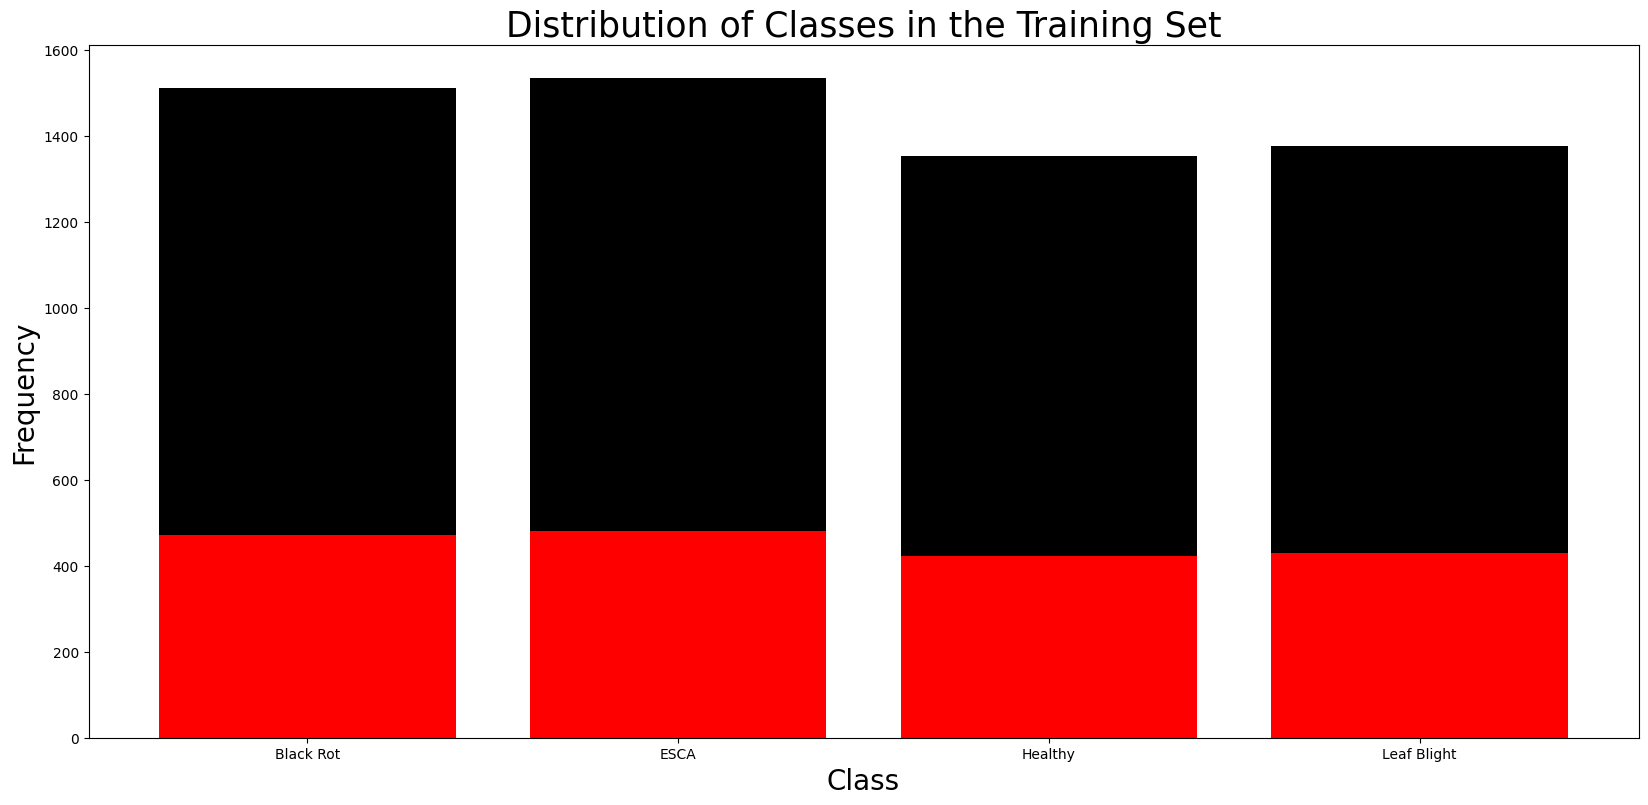

In [52]:
plt.figure(figsize=(20,9))
plt.bar(labels_training, freq_training, color='black')
plt.bar(labels_training, freq_val, color='red')
plt.xlabel('Class', fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('Distribution of Classes in the Training Set',fontsize=25)
plt.show()

***
* ### *Inspecting data's target directory*
* ### *For both validation and train folders there are 4 classes*
* ### *As can be seen both on the printed statement and on the bar-chart the classes are balanced*
* ### *Both validation and training set are balanced as can be seen on the diagram*
***

***

<h4 align='center'>DATA VISUALIZATION</h4>

***

In [53]:
def plot_train_img(direc, labels, samples=5):
	fig, axes = plt.subplots(len(labels), samples, figsize=(15,15))
	for i,j in enumerate(labels):
		label_dir = os.path.join(direc, j)
		images = os.listdir(label_dir)[:samples]
		for k,l in enumerate(images):
			img_path = os.path.join(label_dir, l)
			img = load_img(img_path, target_size=(240,240))
			axes[i,k].imshow(img)
			axes[i,k].axis('off')
			axes[i,k].set_title(j, size=12, y=-0.17)
	plt.tight_layout()
	plt.show()

***
* ### *By defining the function that sequentially accesses the path of the images and limits to the number specified as a parameter for the function*
* ### *We can visualize the images and understand the data a bit more*
* ### *Further the images are plotted on the table and are limited to 5 meaning 5 images per class*
***

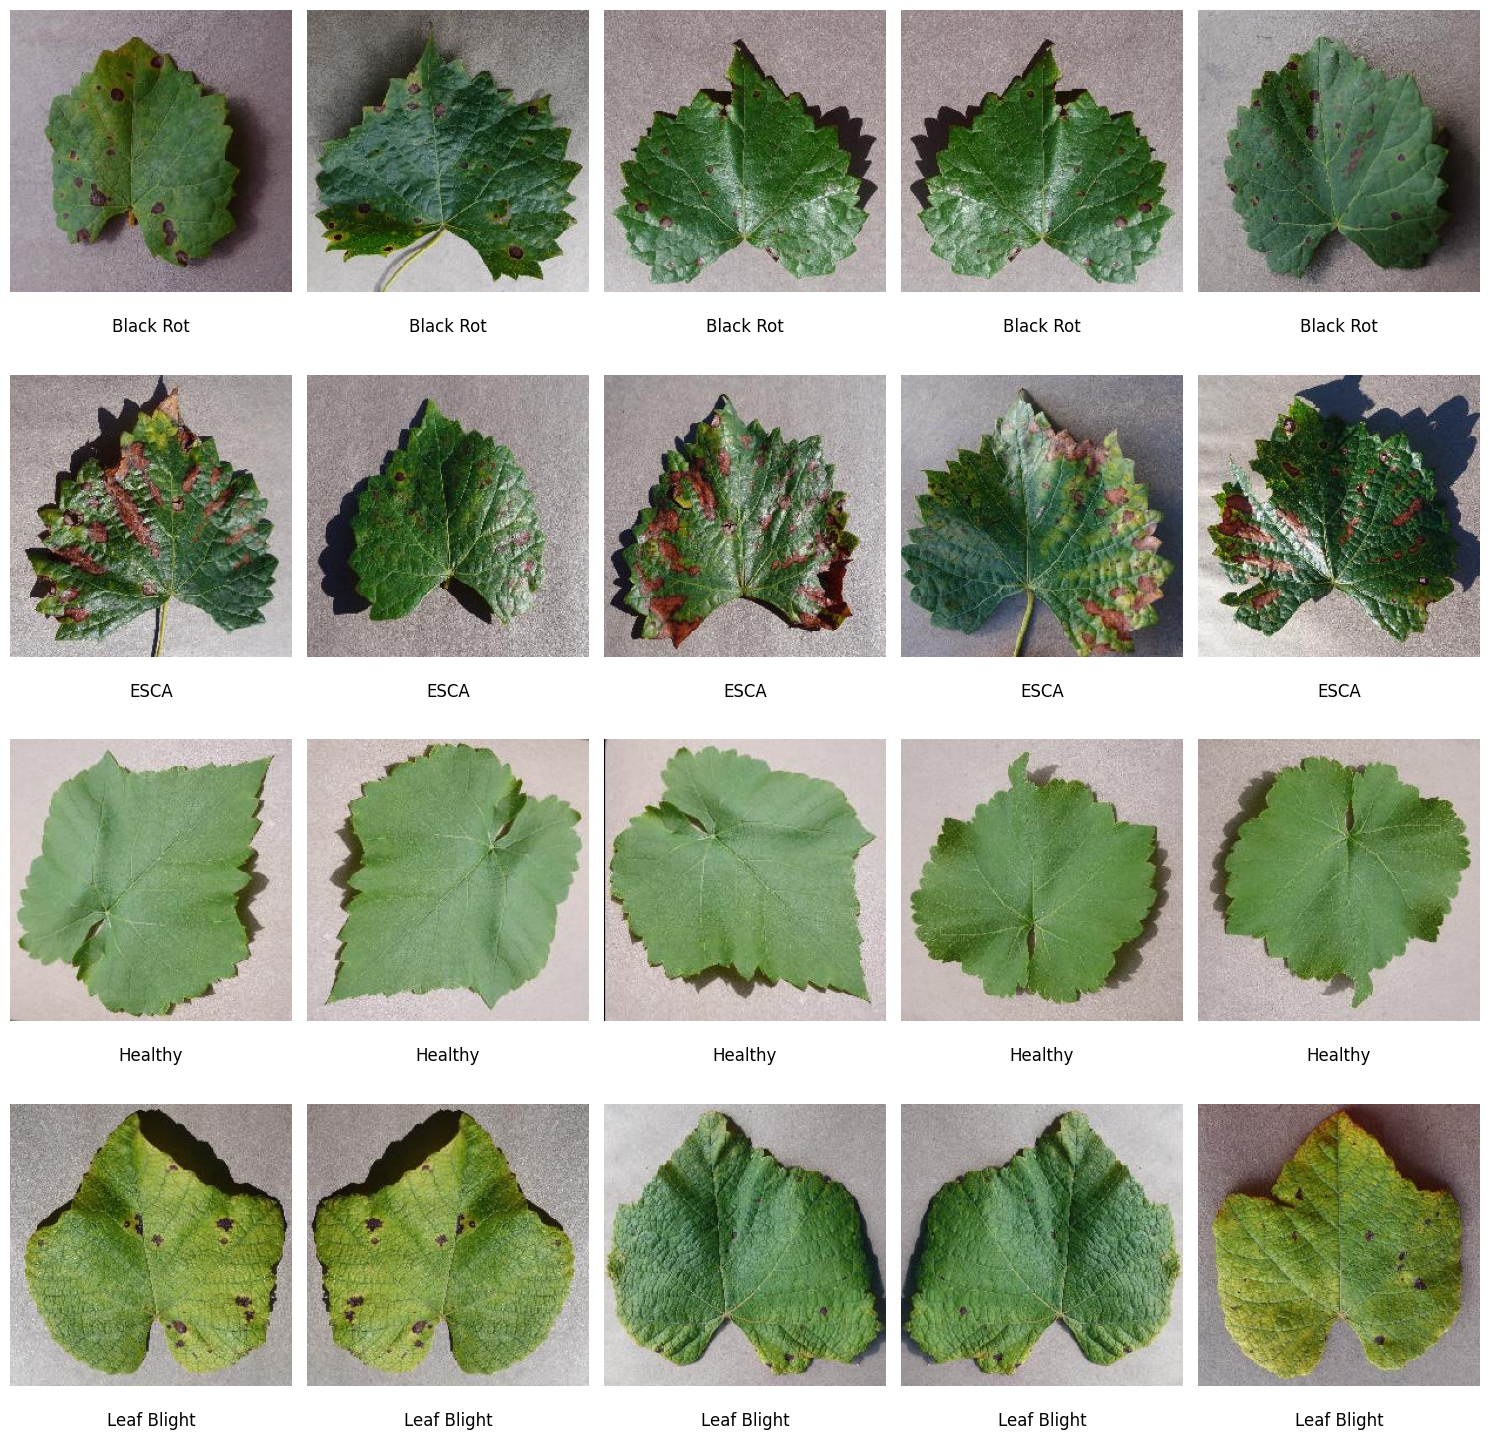

In [54]:
plot_train_img(training_dir, labels_training)

***
* ### *As can be seen on the diagram each class clearly has different health variations*
* ### *Images are mostly the same however, fluctuations in horizontal orientations are present*
* ### *Zoom range on the images is mostly the same as well as fairly equal sizes of the leaves is used*
* ### *Due to this factors data augmentation will be beneficial to create a more robust classification model*
* ### *Moreover, the images have 3 channels (RGB) and the color of the leaves are different, therefore by decreasing the channels to 1 we will loose a lot of information*
***

***

<h4 align='center'>DATA DIMENSIONS</h4>

***

In [55]:
def dimension_check(directory):
	dims = []
	for i in os.listdir(directory):
		label_dir = os.path.join(directory, i)
		for i in os.listdir(label_dir)[:10]:
			img_path = os.path.join(label_dir, i)
			with Image.open(img_path) as img:
				dims.append(img.size)
	print(dims)

***
* ### *In order to make sure that all images are the same size and get an understanding of the quality to size ratio*
* ### *Function is defined that takes the directory where the data is available and output the sizes of 10 images in a list*
***

In [56]:
dimension_check("Original Data/train")

[(256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]


***

<h4 align='center'>DATA CORRECTNESS/CORRUPTION</h4>

***

In [57]:
def data_correctness(directory):
	correct_extensions = ('.jpg', '.png', '.jpeg' )
	wrong =[]
	for i in os.listdir(directory):
		label_dir = os.path.join(directory, i)
		for i in os.listdir(label_dir):
			if not i.lower().endswith(correct_extensions):
				wrong.append(i)
	print(wrong)

***
* ### *In order to ensure for a model to work correctly it is important to discard or make sure there no corrupted files present*
* ### *By defining a function that returns list of corrupted or non image files it is possible to filter these files out*
***

In [58]:
data_correctness(training_dir)

[]


***
* ### *It can be seen that there are no corrupted files*
* ### *All images belong to the correct extensions therefore, will be able to be used as an input to the model*
***

***

<h2 align='center'><strong>DATA PREPROCESSING</strong></h2>

***

***

<h4 align='center'>DATA AUGMENTATION/NORMALIZATION</h4>

***

In [59]:
train_datagenerator = ImageDataGenerator(rescale=1./255, zoom_range=0.2, height_shift_range=0.15, width_shift_range=0.15, brightness_range=[0.7, 1.4])

***
* ### *As mentioned previously data-points in the dataset are mostly similar*
* ### *In order to increase generalization of the model certain augmentation techniques will have to be applied*
* ### *Initially pixel values will have to be normalized to be either 1 or 0 therefore, "rescale" option is set to divide all pixel values by 255*
* ### *"zoom_range" initialized at 20% is used to have some images to be bigger and some smaller*
* ### *"height and width shift_range" is both initialized at 15% and have the same ration in order to not overstretch the images and have proportionality*
* ### *Due to possible fluctuations in the light for example because of the time of the day brightness ranging from 70% to 120% is set to create a wider spectrum of lightness or darkness of the images*
***

In [60]:
val_datagenerator = ImageDataGenerator(rescale=1./255)

***
* ### *Validation set does not need to be augmented*
* ### *However, normalization is essential for a model to be able to take it as data to provide validation_loss and accuracy*
***

In [61]:
train_set = train_datagenerator.flow_from_directory("Original Data/train", target_size=(128,128), batch_size=32, class_mode='categorical')

Found 5779 images belonging to 4 classes.


***
* ### *Data loading is done by tensorflow preprocessing library for an ease of handling*
* ### *As images are 256x256 resizing is done decreasing it to 128x128*
* ### *Batch size is set at 32 as the dataset is not too big*
* ### *Class_mode is set to categorical in order to pull label from folder names*
***

In [62]:
val_set = val_datagenerator.flow_from_directory("Original Data/test", target_size=(128,128), batch_size=32, class_mode='categorical')

Found 1805 images belonging to 4 classes.


In [63]:
test_set = val_datagenerator.flow_from_directory("Original Data/testing", target_size=(128,128), batch_size=32, class_mode='categorical')

Found 1443 images belonging to 4 classes.


***
* ### *Loading validation set is the same to training*
***

***

<h2 align='center'><strong>MODEL ARCHITECTURE</strong></h2>

***

In [64]:
model = Sequential()

In [65]:
with tf.device('/GPU:0'):
	model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
	model.add(BatchNormalization())
	model.add(MaxPooling2D(2,2))
	model.add(Conv2D(64, (3,3), activation='relu'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D(2,2))
	model.add(Conv2D(128, (3,3), activation='relu'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D(2,2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dropout(0.5))
	model.add(BatchNormalization())
	model.add(Dense(4, activation='softmax'))

C:\Users\ASUS ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



***
* ### *The best model after experimentation*
* ### *Initial layer of 32 filters with kernel size of 3 by 3 is implemented*
* ### *Batch Normalization and MaxPooling layers are implemented as well to generalize and decrease image sizes*
* ### *Same sequence of initial three layers is repeated 3 times each time increasing the filter number of Convolution Layers by a factor of 2*
* ### *Only 1 Dense layer is implemented before output node with node number being 128*
* ### *All activations except the output are set to be 'relu'*
***

In [66]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

***
* ### *Optimizer is set to Adam with a learning rate of 0.001 to ensure good accuracy with speed and accuracy of training*
* ### *Due to the nature of the task being multi-class classification 'categorical_crossentropy" is chosen as the loss function*
* ### *Metric for evaluation is set to accuracy*
***

In [67]:
es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.0001, restore_best_weights=True)

***
* ### *For utility purposes of training the model certain callback are implemented*
* ### *Early stopping is set to halt the training process when there is no improvement of validation_accuracy*
* ### *patience of early stopping is set to 5 to ensure timeliness of training and min_delta is set to 0.0001 to stop the model if the difference is more than this value*
***

In [68]:
mc = ModelCheckpoint('best_grape_model.keras',monitor='val_accuracy', save_best_only=True, verbose=1 )

***
* ### *Model checkpoint is set to save the best model by monitoring validation_accuracy*
* ### *This is done to save time if there is a failure in training so the model can continue from the point of stoppage*
* ### *Verbose is set to 1 just for visualization purposes in the training log*
***

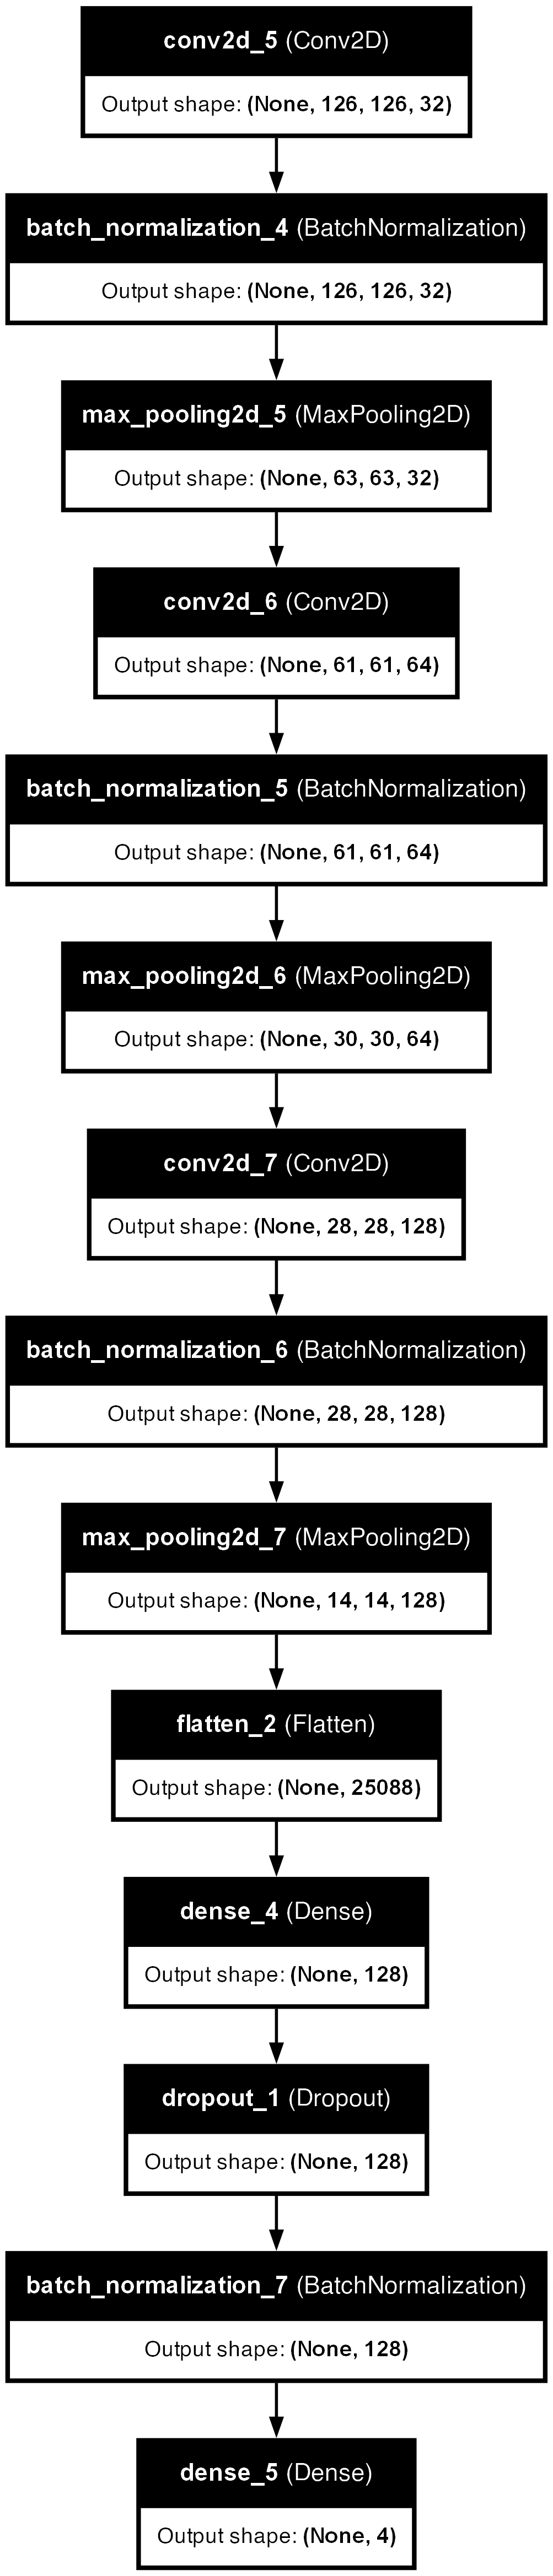

In [69]:
plot_model(model, to_file='best_model.png', show_shapes=True, show_layer_names=True)

In [70]:
start = time.time()

***
* ### *Time library is used to create a variable that will show time taken for training the model*
* ### *This will aid in noting the performance of the models during experimentation phase*
*** 

In [71]:
history = model.fit(train_set, epochs=100, validation_data=val_set, callbacks=[es, mc])

Epoch 1/100


C:\Users\ASUS ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.7139 - loss: 0.7395
Epoch 1: val_accuracy improved from -inf to 0.23435, saving model to best_grape_model.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 89s 479ms/step - accuracy: 0.7143 - loss: 0.7385 - val_accuracy: 0.2343 - val_loss: 7.9578
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.8711 - loss: 0.3489
Epoch 2: val_accuracy improved from 0.23435 to 0.46593, saving model to best_grape_model.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 89s 489ms/step - accuracy: 0.8712 - loss: 0.3487 - val_accuracy: 0.4659 - val_loss: 6.8717
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.9184 - loss: 0.2427
Epoch 3: val_accuracy did not improve from 0.46593
181/181 ━━━━━━━━━━━━━━━━━━━━ 89s 489ms/step - accuracy: 0.9185 - loss: 0.2425 - val_accuracy: 0.3490 - val_loss: 7.3489
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.9340 - loss: 0.1765
Epoch 4: val_accuracy improved from 0.46593 to 0.79335, sa

***
* ### *Model is trained*
* ### epoch number is set to 100 that is due to early stopping callback as training will stop upon reaching applicable results
***

In [89]:
end = time.time()

In [90]:
training_time = end - start

In [91]:
print(training_time)

1221.8429517745972


In [92]:
model.save('base_model.keras')

***
* ### *Model is saved to conserve time and reproduce results if needed*
***

***

<h2 align='center'><strong>EXPERIMENTATION</strong></h2>

***

In [106]:
experiments = [
	{'experiment_id' :1, 'description' : 'Base Model', 'val_loss' : 0.0723 , 'val_accuracy' : 0.9756, 'time/s' : 428},
	{'experiment_id' :2, 'description' : 'Added BatchNormalization Layers', 'val_loss' : 0.2898 , 'val_accuracy' : 0.8981, 'time/s' : 257},
	{'experiment_id' :3, 'description' : 'Added Dropout Layers', 'val_loss' : 0.9898 , 'val_accuracy' : 0.7197, 'time/s' : 268},
	{'experiment_id' :4, 'description' : 'Added Extra Convolutional Layer', 'val_loss' : 0.1395 , 'val_accuracy' : 0.969, 'time/s' : 470},
	{'experiment_id' :5, 'description' : 'Changed Optimizer to RMSprop', 'val_loss' : 0.5691 , 'val_accuracy' : 0.8620, 'time/s' : 394},
	{'experiment_id' :6, 'description' : 'Discarded Augmentation on the Training Set (experiment_id: 4 model architecture)', 'val_loss' : 0.2174 , 'val_accuracy' : 0.9230, 'time/s' : 90},
	{'experiment_id' :7, 'description' : 'Increased Dense Layer Nodes to 512 (experiment_id: 4 model architecture)', 'val_loss' : 0.2327 , 'val_accuracy' : 0.9247, 'time/s' : 546},
	{'experiment_id' :8, 'description' : 'Reduce Batch Size from 32 to 16 (experiment_id: 4 model architecture)', 'val_loss' : 0.5120 , 'val_accuracy' : 0.7889, 'time/s' : 487},
	{'experiment_id' :9, 'description' : 'Split the Dense Layer by a factor of 2 (experiment_id: 4 model architecture)', 'val_loss' : 0.2708 , 'val_accuracy' : 0.9019, 'time/s' : 519},
	{'experiment_id' :10, 'description' : 'Change Activation function to tanh for all layers (experiment_id: 4 model architecture)', 'val_loss' : 0.9906 , 'val_accuracy' : 0.6704, 'time/s' : 260},
	]

***
* ### *10 experiments are conducted and results are appended to the table for the ease of visualization*
* ### *For each experiment there are 1 description and 3 performance indicating results*
* ### *All three are important for models performance evaluation*
* ### *All steps are in a sequence starting from the base model accumulating complexity further*
***

In [107]:
ex_table = pd.DataFrame(experiments)
ex_table.index=ex_table['experiment_id']
ex_table.drop('experiment_id', axis=1, inplace=True)

***
* ### *All experiments are added to the DataFrame for ease of visualization*
* ### *Each step in the experimentation has an id feature showing the order of the experiments*
***

In [108]:
ex_table

description  val_loss  \
experiment_id                                                                
1                                                     Base Model    0.0723   
2                                Added BatchNormalization Layers    0.2898   
3                                           Added Dropout Layers    0.9898   
4                                Added Extra Convolutional Layer    0.1395   
5                                   Changed Optimizer to RMSprop    0.5691   
6              Discarded Augmentation on the Training Set (ex...    0.2174   
7              Increased Dense Layer Nodes to 512 (experiment...    0.2327   
8              Reduce Batch Size from 32 to 16 (experiment_id...    0.5120   
9              Split the Dense Layer by a factor of 2 (experi...    0.2708   
10             Change Activation function to tanh for all lay...    0.9906   

               val_accuracy  time/s  
experiment_id                        
1                    0.9756     428  
2                    0.8981     257  
3                    0.7197     268  
4                    0.9690     470  
5                    0.8620     394  
6                    0.9230      90  
7                    0.9247     546  
8                    0.7889     487  
9                    0.9019     519  
10                   0.6704     260

***
* ### *After extermination and noting the performance metrics on validation set*
* ### *In order to choose the best architecture 3 variables have to be taken into account*
* ### *validation loss accuracy and time*
* ### *Best model will be the one where all three values are sufficiently appropriate*
***

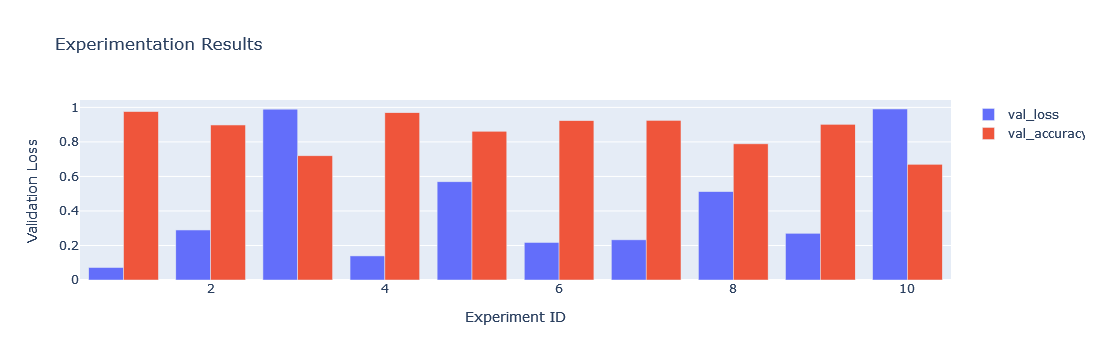

In [109]:
fig = go.Figure(data=[
	go.Bar(name='val_loss', x=ex_table.index, y=ex_table['val_loss'] ),
	go.Bar(name='val_accuracy', x=ex_table.index, y=ex_table['val_accuracy'] )
])
fig.update_layout(
	title = 'Experimentation Results',
	xaxis = dict(title='Experiment ID'),
	yaxis = dict(title='Validation Loss'),
	barmode='group'
)
fig.show()

***
* ### *Bar chart shows more or less decent performance on all experiments in regards to accuracy*
* ### *However, time is not shown as a feature therefore, the bar chart is only shown to visualize the difference in accuracy and loss*
***

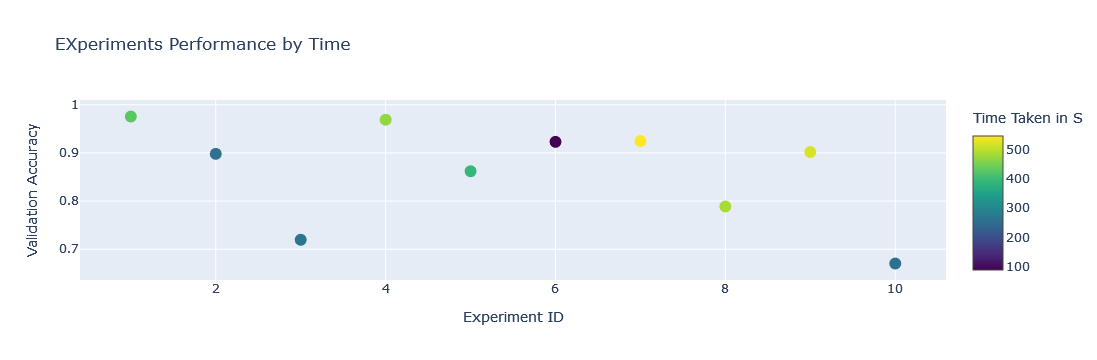

In [110]:
fig2 = go.Figure(
	data=go.Scatter(x=ex_table.index, y=ex_table['val_accuracy'], mode='markers', marker=dict(
		size=12,
		color=ex_table['time/s'],
		colorscale='Viridis',
		colorbar=dict(title='Time Taken in S')
	),text = ex_table['description'])
)
fig2.update_layout(
	title = 'EXperiments Performance by Time',
	xaxis = dict(title='Experiment ID'),
	yaxis =dict(title='Validation Accuracy')
)
fig2.show()

***
* ### *As can be seen on the scatter chart above*
* ### *Experiments have moderately fluctuating accuracy and time taken to train the model*
* ### *Highest and most accurate architecture is the base model(shown below)*
* ### *However, due to lack of generalization in the architecture of the model. Model is prone to over-fit hence the higher results*
* ### *Moreover, time taken to train the model is high in contrast to other experiments*
* ### *In order to create a model that generalizes well experiments 2 and 3 were trained with added Dropout and Normalization layers*
* ### *Due to this accuracy was lower but training speed increased nearly by 2 times however, after adding extra convolution layer in experiment 4 ration between accuracy and speed looked promising*
* ### *Further experiments were done to experiment with hyperparameter. Experiments 5 and 6 were done with different optimizer and without data augmentation, results were inferior to experiment 4*
* ### *7th Experiment was done with introduction of bigger Dense layer before the output. Accuracy was in the 90th percentile however, time taken was the highest to this point*
* ### *Experiments 8 and 9 were done with changing the batch size and division of the Dense Layer before output by a factor of 2 both results were inferior in accuracy and time to experiment 4*
* ### *Experiment was done by changing all 'relu' activations to 'tanh' while being fast accuracy was the lowest out of all experiment done previously*
***

In [111]:
b_model = Sequential()

In [112]:
b_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
b_model.add(MaxPooling2D(2,2))
b_model.add(Conv2D(64, (3,3), activation='relu', input_shape=(128,128,3)))
b_model.add(MaxPooling2D(2,2))
b_model.add(Flatten())
b_model.add(Dense(64, activation='relu'))
b_model.add(Dense(4, activation='softmax'))

C:\Users\ASUS ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



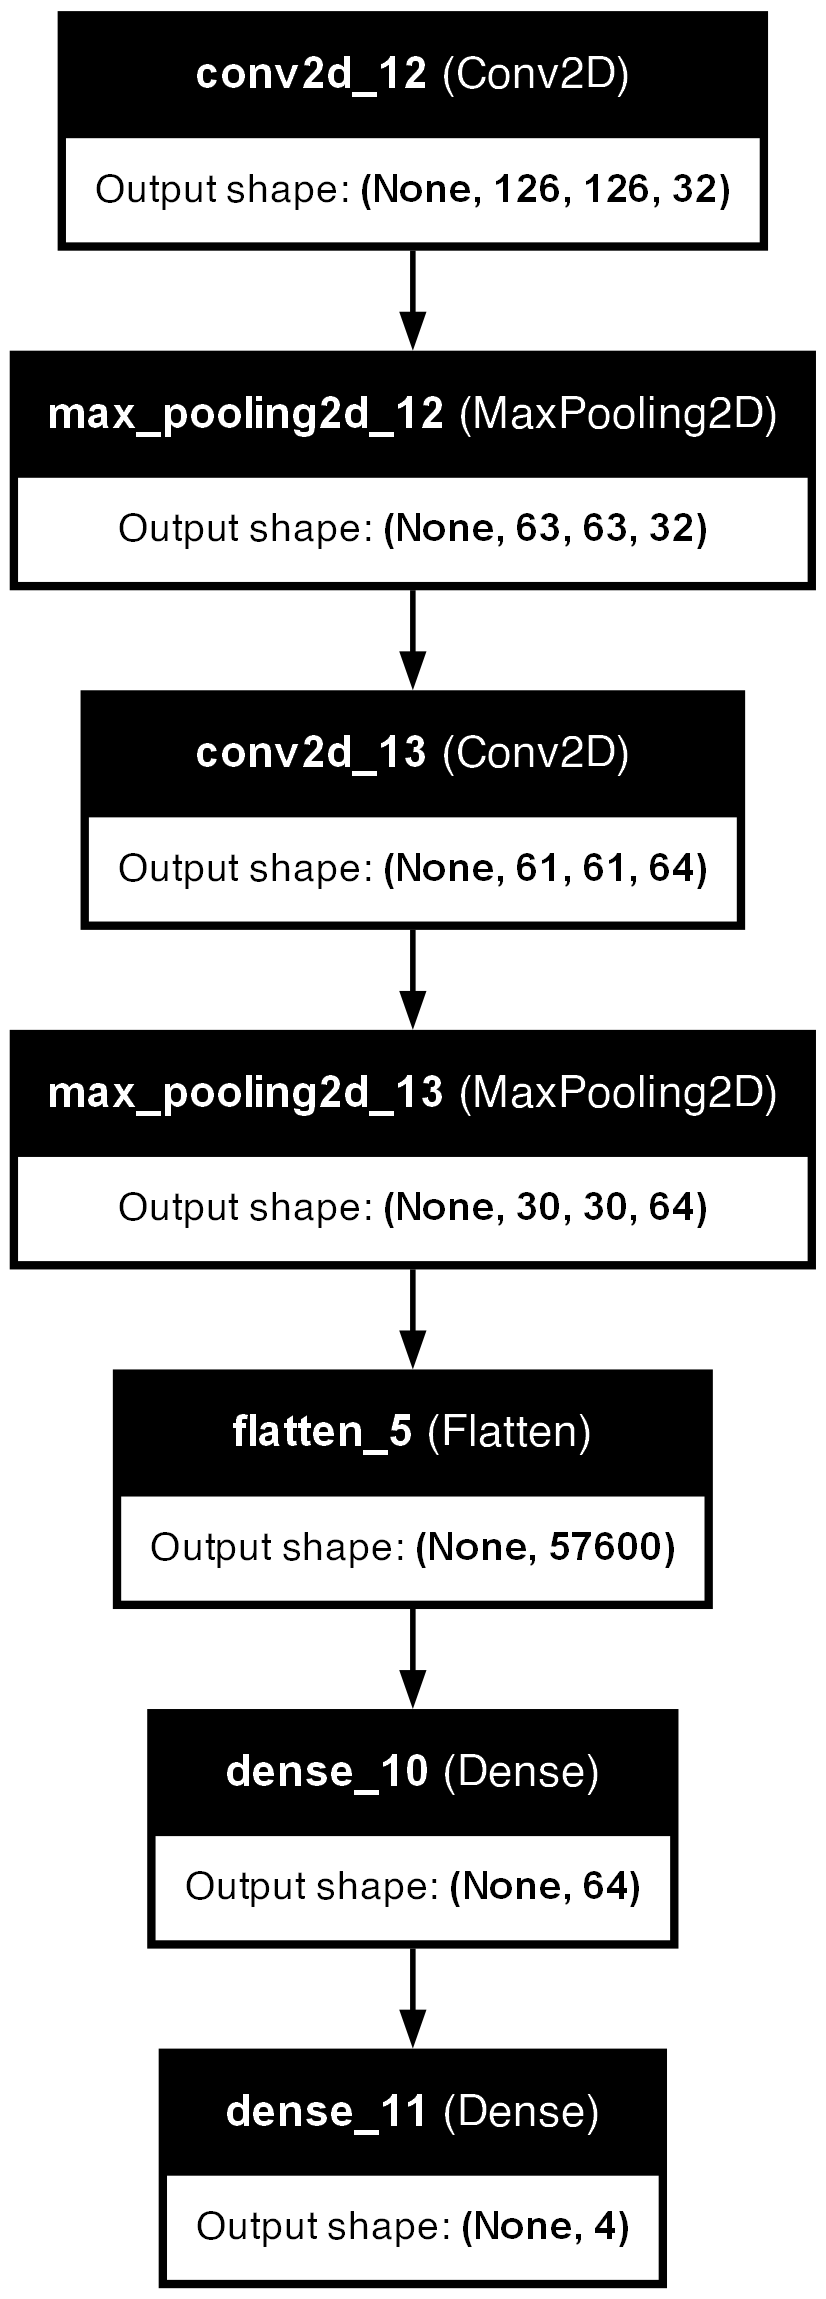

In [113]:
plot_model(b_model, to_file='base_model.png', show_shapes=True, show_layer_names=True)

***
* ### *Above is visualization of the base model upon which all experiment were done*
***

***

<h2 align='center'><strong>EVALUATION</strong></h2>

***

In [114]:
best_model = load_model('base_model.keras')

***
* ### *The best model is loaded*
***

In [115]:
test_loss, test_accuracy = best_model.evaluate(test_set)
print(f'Test Loss {test_loss}')
print(f'Test Accuracy {test_accuracy}')

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9846 - loss: 0.0509
Test Loss 0.05096808820962906
Test Accuracy 0.9847539663314819


***
* ### *Model performed extremely well on the test with accuracy of 98%*
* ### *Loss was minimal as well*
***

In [116]:
test_set.reset()
pred = best_model.predict(test_set)
predicted_labels = np.argmax(pred, axis=1)
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step


***
* ### *In order to create the confusion matrix predicted labels are added to the variable pred*
* ### *Real classes are added to true_classes*
***

In [117]:
confusion_matrix = m.confusion_matrix(true_classes, predicted_labels)

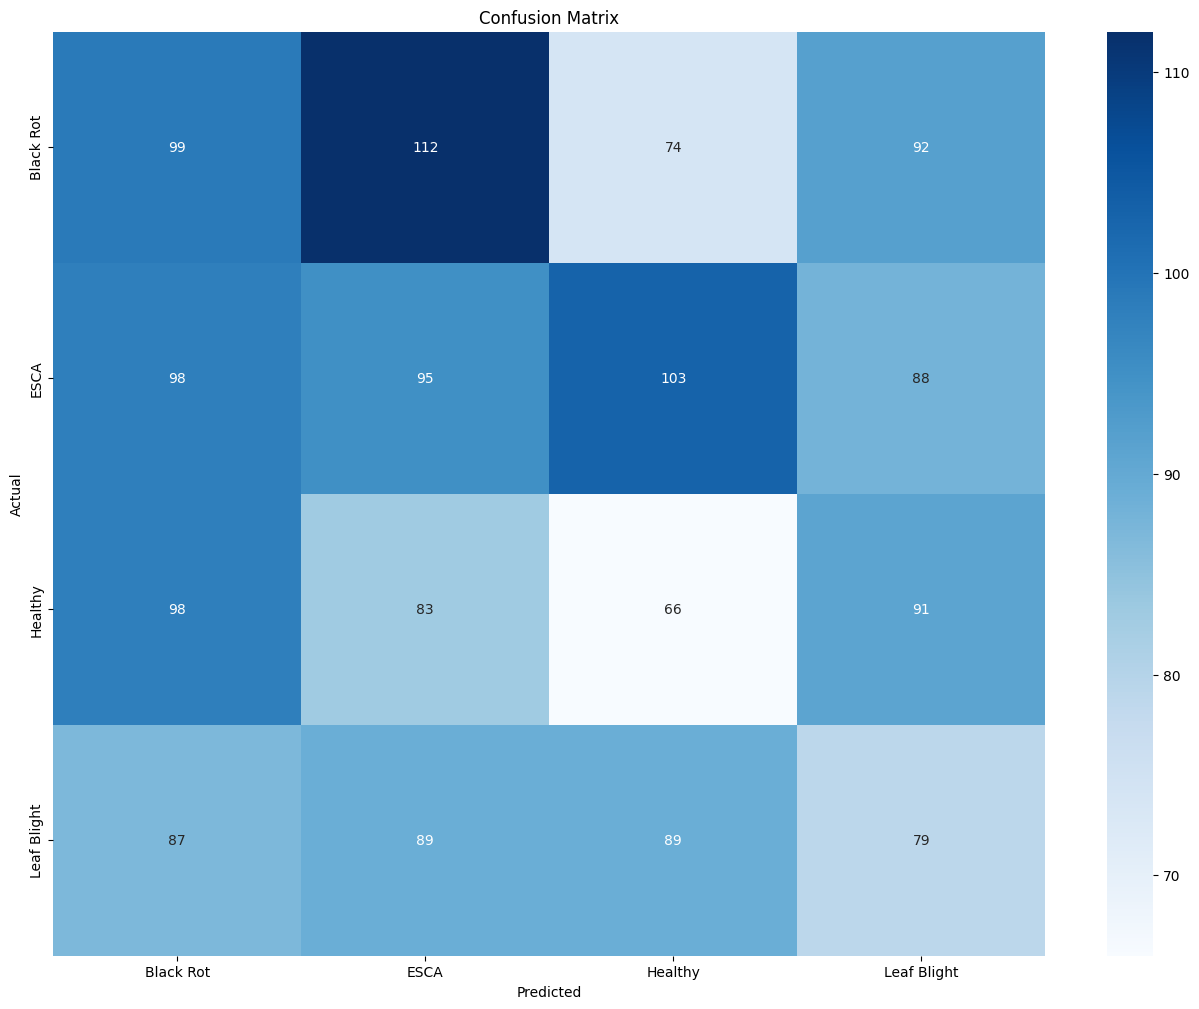

In [118]:
plt.figure(figsize=(16,12))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

***
* ### *As we can see on the heatmap our model has moderate precision and recall*
* ### *The highest value was a 100  and lowest at 75*
***

***

<h2 align='center'><strong>FINAL DISCUSSION</strong></h2>

***

***

<h3 align='center'><strong>CONCLUSION</strong></h3>
<h4>The aim of this pipeline was to construct a model through informed tweaks to the architecture, in order to classify healthiness of the grape leaves in the vineyards. Due to the natur of the task CNN model architecture was chosen as a base. Further model was refined and improved to ensure better results and efficiency. Company will benefit from this model in many ways some them being cost effectiveness as labor cost of manually classifying the health of the plants can be eliminated. Further, timeliness will be improved as cameras can be placed only once and provide information simultaneously and instantly. Overall, performance of the experiment 4 model architecture was the best among 10 experiments. However, there is always room for improvement, is is possible to improve time taken to train the model.</h4>

***

***

<h3 align='center'><strong>RECOMMENDATION</strong></h3>
<h4>To further enhance the quality of the model. Dataset can be expanded, introduce images from different regions with varying lighting, conditions, seasons, weather and so forth. Further, more classes can be added to increase the complexity and bring the model closer for a real-world application. Improve data augmentation to generalize the model well to all possible scenarios. Use advanced architecture such as ResNet, EfficientNet and etc. Apply Regularization techniques to limit overfitting. Create automatic monitoring techniques to perpetually improve the model and monitor the performance.</h4>

***